# Nerual Network From Scratch 
---
## The goal is to create a neural network which identifies handwritten numbers using using only the NumPy and Pandas libraies.

The dataset here is the well known MNIST handwritten digit dataset, commonly used for ML and computer vision projects. The data files contain gray-scale images of hand-drawn digits, from zero through nine. Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive. [Data Source](https://www.kaggle.com/competitions/digit-recognizer/data)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Data importing and formatting

##### First I will import the data using pandas. As you can see, each row corressponds to an example and each column to  a pixel value. Transpose the data such that the columns of the dataset represent examples and the rows represent the pixel data. This step is not necessary but I think it helps visualize each pixel going into one node.

##### Next, I will create the training data, which I’ll feed the NN to train it, and then a development dataset which I’ll use later to ensure the NN isn’t overfitted to just the training data. These will be the X_train and X_dev respectively. The Y_train and Y_dev will be the same but only correspond to the labels of each example.

In [2]:
data = pd.read_csv('data\\train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(data)
m, n = data.shape # m = rows n = cols
np.random.shuffle(data) # Shuffle the data before splitting

data_dev = data[0:1000].T # Of the first 1000 rows, rotate (transpose) the dataframe so that they are now columns
Y_dev = data_dev[0] # This is the label row
X_dev = data_dev[1:n] # These are the pixel data rows (values 0,255)

data_train = data[1000:m].T # Of the rows after 100, traspose that dataframe so that they are now columns
Y_train = data_train[0] # Define the label row
X_train = data_train[1:n] # Define the pixel data rows

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,40990,40991,40992,40993,40994,40995,40996,40997,40998,40999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
780,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
781,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
782,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Each pixel data value corresponds to a range between 0 and 255 with 0 being white and 255 black. For future calculation, it’s easier if this value is converted to a range between 0 and 1 which can be done by dividing each value in the array by 255.

In [4]:
X_dev = X_dev / 255 
X_train = X_train / 255
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,40990,40991,40992,40993,40994,40995,40996,40997,40998,40999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## NN Explanation

I attempt to touch on all the basics here so it's a bit lengthy

Now it’s time to create the NN. This NN will consist of 3 layers, the first is an input layer which will just be the value of each pixel in an example. There are 784-pixel values per example and thus this layer will have 784 nodes. Since our training dataset already contains 784 values per node, this can be used to represent the nodes instead of wasting memory creating a new node array.

Next will be the hidden layer, this layer will take the values from the input layer and perform a linear operation with each node’s set of weights and biases. These weights and biases are the parameters the network will tune to optimize the output, to *learn*. This layer will only need to consist of 10 nodes though. Each node corresponding to an output of the numbers 1-10, as we will be labeling.

The weights will be a random number between -0.5 and 0.5 to be tuned through backward propagation, which will be set up later. The weights can be implemented as a matrix $w$ with dimensions of the current layers nodes ($nodes^{[l]}$) by previous layers nodes ($nodes^{[l-1]}$) ie $nodes^{[l]} \times nodes^{[l-1]}$ which for the hidden layer would be $10\times784$. Biases are the constants added to each node, so they can be represented as matrix $b$ with dimensions $nodes^{[l]}\times 1$.

The weights and biases will be combined with the input to nodes using the following linear equation $$nodes^{[l]} = w^{[l]}\times input+b^{[l]}$$ To implement this a operation, a for loop could be used but this would result in time complexity of $\Omega(s*n*m*n)$ where $s$ is the iterations, $m$ is the dataset sample number, and $n$ is the dataset feature number. A much more efficient method for performing the function would be the vectorized implementation which you can read more about it in Yang Liu’s - [Vectorization Implementation in Machine Learning](https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d). To do this, we just obtain the dot product of the input and weights matacies (which are actually NumPy arrays). This will return a new matrix $10\times \text{example length}$ which represents the $w^{[l]}\times input$ part of the linear expression for all the examples.

The bias, if you remember has dimensions $nodes^{[l]}\times 1$ which is equivalent to $1\times10$ for this layer. Each example in our new matrix is also $1\times10$ so we can perform a simple matrix addition of $b+example^{[x]}$ for all examples in the matrix.

Before moving on, we need to apply one more function to this layer. So far we have only performed linear functions on this layer but to ensure we're not just creating a linear regression model, we’ll apply an activation function. In this case, I intend to use the activation function known as Rectified Linear Unit or ReLU. This function is to be applied to each of our nodes in the hidden layer before being passed on to the last layer.

- ReLU is a pretty simple function it takes in an input $x$ and returns $x$ if $x>0$ and returns $0$ if $x<0$
<h3 align="center">ReLU Example</h3>
<p align="center">
    <img src="https://raw.githubusercontent.com/DannyAlas/Neural-Network-1/main/img/ReLU.png" alt="ReLU" width="300" />
</p>

In [5]:
def params():
    weightsH = np.random.randn(10, 784) # Initialize a matrix of weights for the hidden layer (784 in : 10 out)
    biasH = np.random.randn(10, 1) # Initialize biasis for the 10 hidden layer nodes
    
    weightsO = np.random.randn(10, 10) # Initialize weights for ouptut layer
    biasO = np.random.randn(10, 1) # Initialize biasis for output layer

    return weightsH, biasH, weightsO, biasO

def ReLU(E):
    return np.maximum(E, 0) # Returns E if E>0 and 0 if E<0

For the final layer of the NN, the output, we want to perform the same linear expression for the nodes but the output this time needs to be a list of probabilities for each label. This can be done with a [Softmax function](https://en.wikipedia.org/wiki/Softmax_function). Here's a wonderful visualization of what's going on by [Dario Radečić](https://towardsdatascience.com/softmax-activation-function-explained-a7e1bc3ad60)
<p align="center">
    <img src="https://miro.medium.com/max/700/1*ReYpdIZ3ZSAPb2W8cJpkBg.jpeg" alt="Softmax" width="500" />
</p>

In [6]:
def softMax(E):
    x = np.exp(E) / sum(np.exp(E)) # Given the input of a matrix, returns probabilty of each value  
    return x

def prop(weightsH, biasH, weightsO, biasO, X):
    net1 = weightsH.dot(X) + biasH # weights * input + bias (net)
    out1 = ReLU(net1) # output through activation function (node output)
    net2 = weightsO.dot(out1) + biasO # weight * previous node output + bias
    pred = softMax(net2) # label prediction given the net2 matrix
    return net1, out1, net2, pred   

## Backwards Propagation

Now that we have the NN, we need it to *learn*, we need it to adjust its values over time to increase its accuracy. This is done through a method known as Backwards propagation, where we go through the nodes and adjust the parameters in such a way that we obtain better results.
There are a few different methods to adjust the values in backward propagation but in this case, I'll use [Gradient Descent.](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) Basically, we want to change a parameter, call it $X$, such that the error, $E$, decreases. A good way to do this is $$\alpha \frac{\partial E}{\partial X}$$ that is we need to find the derivative of $E$ with respect to $X$. Also, α is a parameter in the range [0,1] known as the **learning rate** which is set by us and allows us to scale the *step size* of the gradient descent. We can obtain the error, $E$, by just taking the log of the probability given for the correct prediction, $Y$, for a given $X$. $$E = \log(Y^{[x]})$$ In other words, for an example in the dataset, the error will be the log of the probability given for the correct prediction. We can then take the derivative of this error and subtract it from the parameter.

Then, to calculate $\partial W^{[1]}$ (derivative of weight for the hidden layer) and $\partial B^{[1]}$ (for bias), we'll first find $\partial X^{[1]}$.
Let $g$ = activation function:

$$\partial X^{[1]} = W^{[2]T} \partial X^{[2]} .* g^{[1]\prime} (X^{[1]})$$

We then apply the weights between the hidden layer and output layer in reverse and perform an element-wise multiplication with the derivative of the activation function, akin to "undoing" it, to get the correct error values.

In [7]:
def ReLU_deriv(x):
    return x > 0

def oneHot(Y):
    """
    Given the input lables creates a matrix of zeros transposed such that rows corralate to number of labels and columns corralate to the data length. 
    Then for each column, the row that corraltes to its label value-1 (since labels start at 1 but rows in the matrix start at 0) gets filled in with a 1. 
    Thus returning a list of zeros with a 1 in the position of the label
    5 = [0,0,0,0,5,0,0,0,0,0]
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1)) # Create the matrix filled with zeros
    one_hot_Y[np.arange(Y.size), Y] = 1 # Replaces 0 with 1 where the row matches the label - 1
    one_hot_Y = one_hot_Y.T # transposes the matrix, now rows = labels
    return one_hot_Y

def error(weightsO, pred, net1, out1, net2, X, Y):
    # Working backwords determine the error (delta) based on label
    oneHot_Y = oneHot(Y)
    error = pred - oneHot_Y
    d_WO = 1 / m * error.dot(out1.T)
    d_BO = 1 / m * np.sum(error)
    d_net1 = weightsO.T.dot(error) * ReLU_deriv(net1)
    d_WH = 1 / m * d_net1.dot(X.T)
    d_BH = 1 / m * np.sum(d_net1)
    return d_WH, d_BH, d_WO, d_BO

def updater(weightsH, biasH, weightsO, biasO, d_WO, d_BO, d_WH, d_BH, alpha):
    # Update the weights and biases given the erros deltas
    weightsH = weightsH - alpha * d_WH
    biasH = biasH - alpha * d_BH
    weightsO = weightsO - alpha * d_WO
    biasO = biasO - alpha * d_BO
    return weightsH, biasH, weightsO, biasO

That's it. Now lets just run the network

In [8]:
def prediction(pred):
    return np.argmax(pred, 0)

def get_accuracy(predictions, Y):
    return round(np.sum(predictions == Y) / Y.size, 4)

In [9]:
accuracy = []
def gradient_descent(X, Y, alpha, epochs): # X = training data, Y = labels, alpha = learning rate, epochs = iterations
    """
    First initializes the weights and biases then
    
    For number of epochs set, 
        propogates the network forward calculating the output 
        calculates the error from the output
        updates the weights and biases based on error
        repates
    """
    weightsH, biasH, weightsO, biasO = params()
    
    for i in range(epochs):
        net1, out1, net2, pred = prop(
            weightsH, 
            biasH, 
            weightsO, 
            biasO, 
            X
            )
        d_WH, d_BH, d_WO, d_BO = error(
            weightsO,
            pred, 
            net1, 
            out1, 
            net2, 
            X, 
            Y
            )
        
        weightsH, biasH, weightsO, biasO = updater(
            weightsH, 
            biasH, 
            weightsO, 
            biasO, 
            d_WO, 
            d_BO, 
            d_WH, 
            d_BH, 
            alpha
            )
        accuracy.append(get_accuracy(prediction(pred), Y))
        if i % 100 == 0:
            print("Epoch: ", i)
            print(get_accuracy(prediction(pred), Y))
    return weightsH, biasH, weightsO, biasO

In [10]:
weightsH, biasH, weightsO, biasO = gradient_descent(X_train, Y_train, 0.10, 1001)

Epoch:  0
0.1097
Epoch:  100
0.2669
Epoch:  200
0.3139
Epoch:  300
0.3649
Epoch:  400
0.3994
Epoch:  500
0.4489
Epoch:  600
0.4816
Epoch:  700
0.5055
Epoch:  800
0.5267
Epoch:  900
0.5441
Epoch:  1000
0.5594


In [11]:
fisrt_accuracy = pd.DataFrame(accuracy)

It learned! let's see if we can adjust some parameters to improve its accuracy

In [12]:
weightsH1, biasH1, weightsO1, biasO1 = gradient_descent(X_train, Y_train, 0.20, 5001)

Epoch:  0
0.0823
Epoch:  100
0.3565
Epoch:  200
0.4617
Epoch:  300
0.5383
Epoch:  400
0.5663
Epoch:  500
0.6042
Epoch:  600
0.6303
Epoch:  700
0.6428
Epoch:  800
0.666
Epoch:  900
0.6822
Epoch:  1000
0.6964
Epoch:  1100
0.7093
Epoch:  1200
0.7208
Epoch:  1300
0.7304
Epoch:  1400
0.7389
Epoch:  1500
0.7474
Epoch:  1600
0.7544
Epoch:  1700
0.7612
Epoch:  1800
0.767
Epoch:  1900
0.7727
Epoch:  2000
0.7783
Epoch:  2100
0.7827
Epoch:  2200
0.7868
Epoch:  2300
0.79
Epoch:  2400
0.7941
Epoch:  2500
0.7972
Epoch:  2600
0.7999
Epoch:  2700
0.8028
Epoch:  2800
0.8051
Epoch:  2900
0.8076
Epoch:  3000
0.8098
Epoch:  3100
0.8117
Epoch:  3200
0.8137
Epoch:  3300
0.8158
Epoch:  3400
0.8178
Epoch:  3500
0.8197
Epoch:  3600
0.821
Epoch:  3700
0.823
Epoch:  3800
0.8251
Epoch:  3900
0.8273
Epoch:  4000
0.8286
Epoch:  4100
0.8298
Epoch:  4200
0.8309
Epoch:  4300
0.8321
Epoch:  4400
0.8335
Epoch:  4500
0.8351
Epoch:  4600
0.8367
Epoch:  4700
0.8373
Epoch:  4800
0.839
Epoch:  4900
0.8437
Epoch:  5000
0.851


In [13]:
second_accuracy = pd.DataFrame(accuracy)

## Adjusting the learning rate and epochs resulted in a better prediction

#### Let's visualize the differences

In [14]:
def make_predictions(X, weightsH, biasH, weightsO, biasO):
    _, _, _, pred = prop(weightsH, biasH, weightsO, biasO, X)
    predictions = prediction(pred)
    return predictions

def test_prediction(index, weightsH, biasH, weightsO, biasO):
    image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], weightsH, biasH, weightsO, biasO)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    image = image.reshape((28, 28)) * 255
    plt.imshow(image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


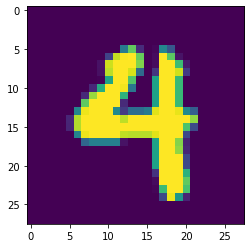

Prediction:  [4]
Label:  4


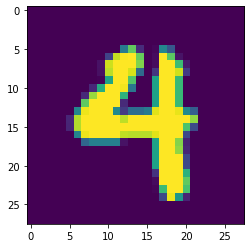

Prediction:  [9]
Label:  4


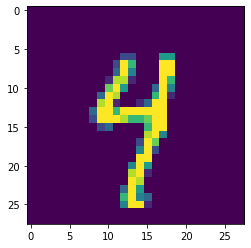

Prediction:  [9]
Label:  4


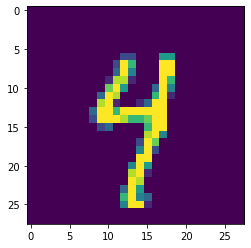

In [15]:
test_prediction(0, weightsH, biasH, weightsO, biasO)
test_prediction(0, weightsH1, biasH1, weightsO1, biasO1)
test_prediction(1, weightsH, biasH, weightsO, biasO)
test_prediction(1, weightsH1, biasH1, weightsO1, biasO1)

Let's plot the learning accuracy over epochs to see how the NN learned

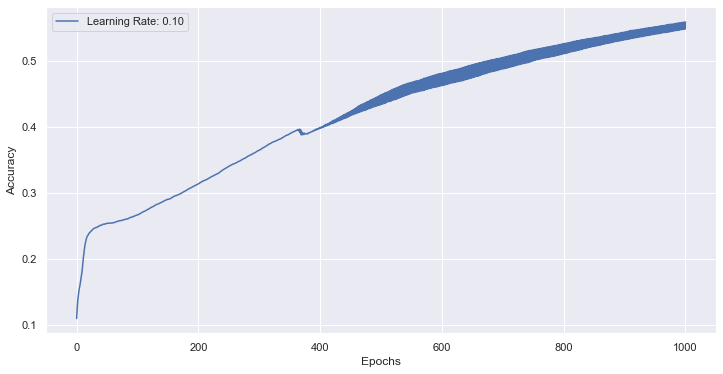

In [18]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")
sns.color_palette("pastel")

p = sns.lineplot(data=fisrt_accuracy, legend=False)
p.set_xlabel("Epochs")
p.set_ylabel("Accuracy")
plt.legend(labels=["Learning Rate: 0.10"])

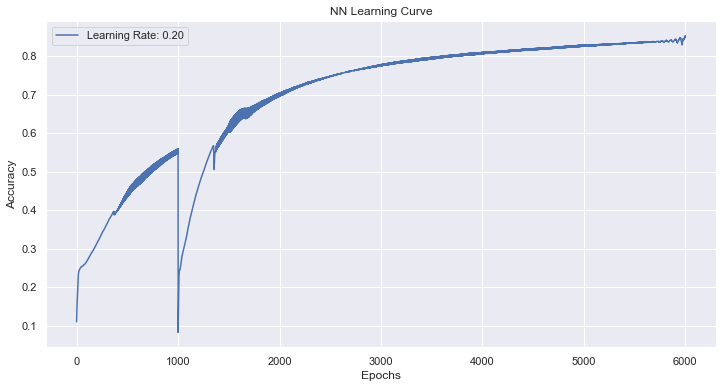

In [19]:
plt.figure(figsize=(12,6))
sns.set_theme(style="darkgrid")

p = sns.lineplot(data=second_accuracy) 
p.set_xlabel("Epochs")
p.set_ylabel("Accuracy")
plt.title("NN Learning Curve")
plt.legend(labels=["Learning Rate: 0.20"])
plt.savefig("./img/NN_Learning_Curve.png")

There seemed to be an interesting drop in accuracy, almost like a reset at epoch 1000. Could be due to the higher learning rate but best to investigate further.

In [25]:
second_accuracy[999:1030]

,0
999,0.5484
1000,0.5594
1001,0.0823
1002,0.1149
1003,0.1407
1004,0.1528
1005,0.1663
1006,0.1862
1007,0.2124
1008,0.2246
